## Lead Scoring Case Study

### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


#### Goals of the Case Study
- There are quite a few goals for this case study:

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### Reading and Understanding the Data

In [2]:
# To read data, first import numpy and pandas libraries

import numpy as np
import pandas as pd

# To visualize the data import below libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
# load warning libraries to supress warnings if any
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the Leads.csv file using pandas "read.csv"
lead_df = pd.read_csv(r'C:\Users\Yeshwant\OneDrive\Desktop\Data Science\LeadScoringCaseStudy\Lead Scoring Assignment\Leads.csv')

In [4]:
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [5]:
# To Check the shape of the data set
lead_df.shape

(9240, 37)

#### There are 9240 rows and 37 columns of data

In [6]:
# To check the data types of columns and null values present in data
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- We can see that all columns are of object/float/int data types
- We can also see that there are null values present in the data

In [7]:
# To check the total count of null values
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

- We got the total count of null values present in each column

In [8]:
lead_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

#### Cleaning and Preparing the Data

- We have already got total count of null values. Now we will handle the null values.

#### The columns having more than 3000 null values can be dropped because they are approximately 30% of total

In [9]:
# We are dropping all columns which are having more than 3000 null values.

for col in lead_df.columns:
    if lead_df[col].isnull().sum() > 3000:
        lead_df.drop(col, axis = 1, inplace = True)

In [10]:
# Checking whether columns greater than 3000 null values are dropped or not
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

- We can see that columns having more than 3000 null values are dropped

In [11]:
#### Country and City columns are having null values but they are not required for analysis, therefore dropping them

# Dropping Country
lead_df.drop('Country', axis = 1, inplace = True)
# Dropping City
lead_df.drop('City', axis = 1, inplace = True)

In [12]:
#### Getting the data type of the columns

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- We can see that many columns are object that means there are many categorical columns. Lets deal with them.

In [13]:
# To get the values count of each column

for col in lead_df:
    print(lead_df[col].astype('category').value_counts())
    print("********************************************")

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
********************************************
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
********************************************
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
********************************

- 'Specialization', 'How did you hear about X education' and 'Lead Profile' are the three columns having 'Select' level.
- This might be because the student did not selected anything for these columns.
- There are many columns with having 1 value in it

In [14]:
# Getting 'Specialization' values count
lead_df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

- 1942 rows are having Select values in Specialization column.

In [15]:
# Getting 'How did you hear about X Education' value counts.
lead_df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [16]:
# Getting 'Lead Profile' value counts
lead_df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

- We can drop the two columns "How did you hear about X Education" and "Lead Profile" as there are more number of select levels.

In [17]:
# Lets drop the two columns
lead_df.drop('How did you hear about X Education', axis = 1, inplace = True)
lead_df.drop('Lead Profile', axis = 1, inplace = True)

In [18]:
# Checking whether they are dropped or not
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- As seen earlier, There are many columns with having one value majorly visible. Lets deal with them

In [19]:
# We can drop those columns as they are having only one value
lead_df.drop(['Do Not Call','Search','Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [20]:
lead_df.shape

(9240, 15)

In [21]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [22]:
lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- Clearly one value is having more number of values, it can be dropped.m

In [23]:
lead_df.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

In [24]:
lead_df.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [25]:
lead_df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [26]:
lead_df = lead_df[~pd.isnull(lead_df['TotalVisits'])]

In [27]:
lead_df.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 29
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                            1431
What is your current occupation           2683
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [28]:
# Getting non-null values
lead_df = lead_df[~pd.isnull(lead_df['Lead Source'])]

In [29]:
# Getting non-null values
lead_df = lead_df[~pd.isnull(lead_df['Specialization'])]

In [30]:
# Getting non-null values
lead_df = lead_df[~pd.isnull(lead_df['What is your current occupation'])]

In [31]:
# Check whether null values again
lead_df.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

- Now the data we have is having with zero null values.

In [32]:
print((len(lead_df.index)/9240)*100)

68.97186147186147


- We have ~69 percentage of data to deal now.

#### Visualization of Data

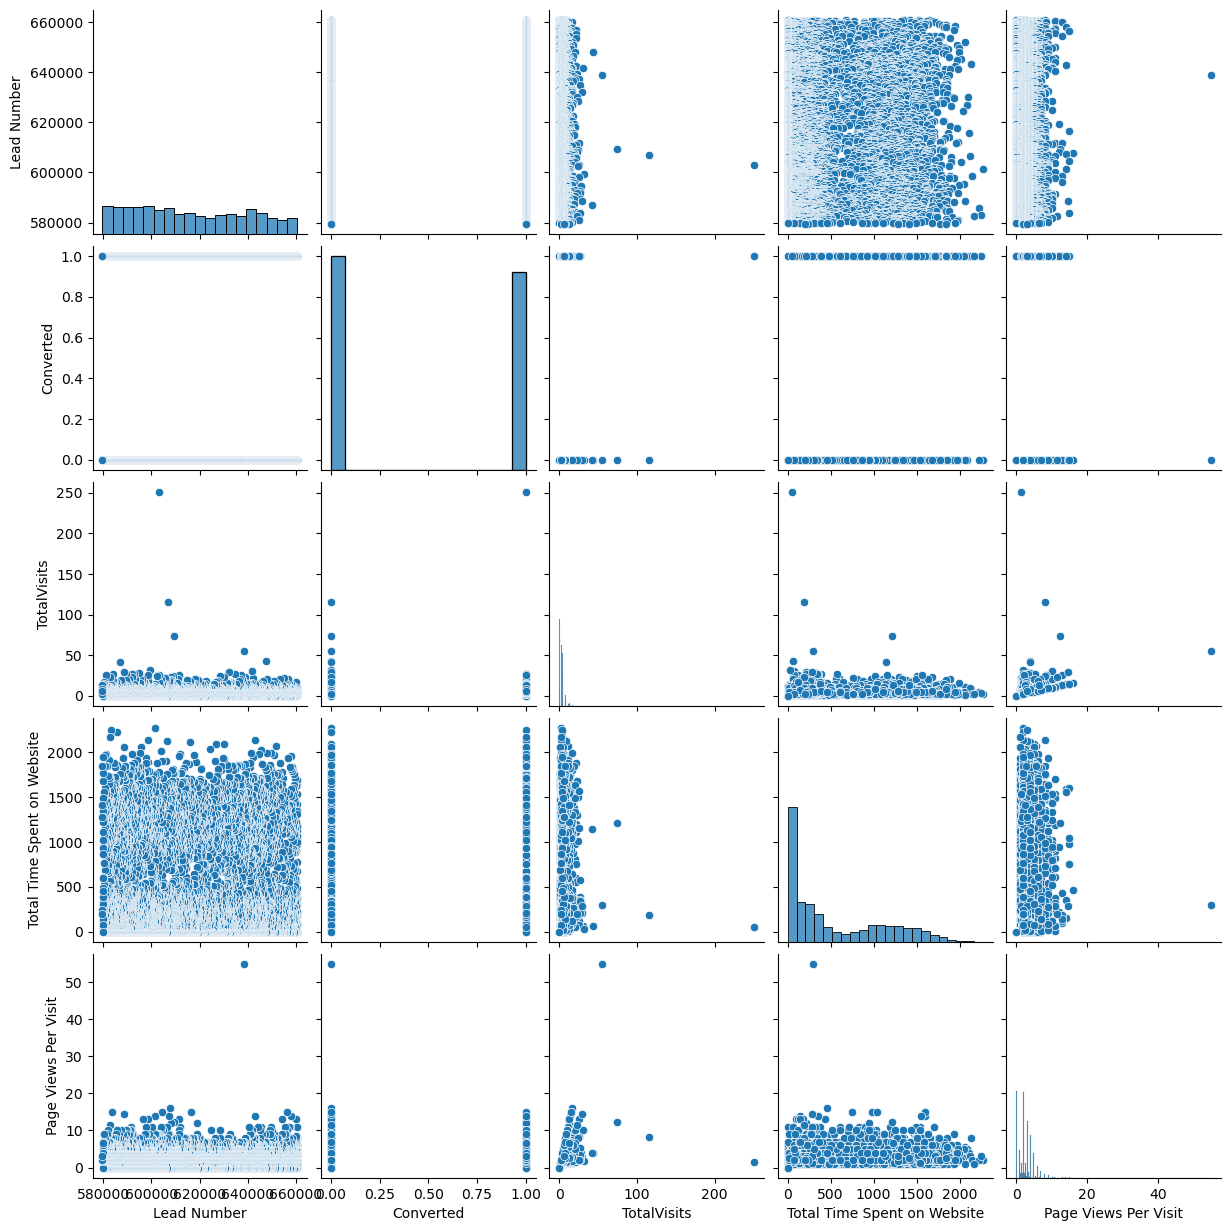

In [33]:
sns.pairplot(lead_df)
plt.show()

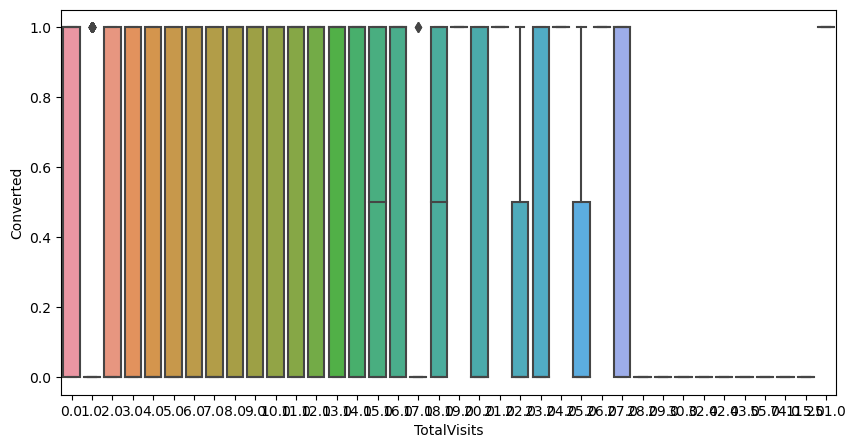

In [34]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'TotalVisits', y = 'Converted', data = lead_df)
plt.show()

In [35]:
# Getting data types of the columns
lead_df.dtypes

Prospect ID                                object
Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

In [36]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
lead_df = pd.get_dummies(data = lead_df, columns = ['Lead Origin','Lead Source','Do Not Email','Specialization',
                                                    'Last Activity','What is your current occupation', 
                                                    'A free copy of Mastering The Interview', 'Last Notable Activity'], drop_first= True)
lead_df.head()

Prospect ID  Lead Number  Converted  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737          0          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728          0          5.0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727          1          2.0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719          0          1.0   
4  3256f628-e534-4826-9d63-4a8b88782852       660681          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  ...  \
0                        0                           0  ...   
1                        0                           0  ...   
2                        0                           1  ...   
3                        0                           1  ...   
4                        0                           0  ...   

   Last Notable Activity_Email Opened  Last Notable Activity_Email Received  \
0                                   0                                     0   
1                                   1                                     0   
2                                   1                                     0   
3                                   0                                     0   
4                                   0                                     0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                    

In [37]:
# Checking the total number of columns after creating dummy variables.
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_testone', 'Do Not Email_Yes',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management'

In [38]:
# Dropping the unwanted columns
lead_df.drop(['Prospect ID', 'Lead Number', 'Specialization_Select'], axis = 1, inplace = True)

In [39]:
lead_df.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  ...  Last Notable Activity_Email Opened  \
0                   0  ...                                   0   
1                   0  ...                                   1   
2                   0  ...                                   1   
3                   0  ...                                   0   
4                   1  ...                                   0   

   Last Notable Activity_Email Received  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1         

In [40]:
lead_df.shape

(6373, 74)

### Split Train and Test Data

In [41]:
# y is assigned to target variable
y = lead_df.pop('Converted')
# X - all our independent variables
X = lead_df

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
train, test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [42]:
print(train.shape)
print(test.shape)

(4461, 73)
(1912, 73)


### Scaling

In [43]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

train.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
8003     0.015936                     0.029489                 0.125   
218      0.015936                     0.082306                 0.250   
4171     0.023904                     0.034331                 0.375   
4037     0.000000                     0.000000                 0.000   
3660     0.000000                     0.000000                 0.000   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
8003                                    1                          0   
218                                     1                          0   
4171                                    1                          0   
4037                                    0                          0   
3660                                    0                          1   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
8003                        0                           1   
218                         0                           1   
4171                        0                           1   
4037                        0                           0   
3660                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  ...  \
8003                     0                   0                      0  ...   
218                      0                   0                      0  ...   
4171                     0                   0                      0  ...   
4037                     0                   0                      0  ...   
3660                     0                   0                      0  ...   

      Last Notable Activity_Email Opened  \
8003                                   0   
218                                    0   
4171                                   0   
4037                                   1   
3660                                   0   

      Last Notable Activity_Email Received  \
8003                                     0   
218                                      0   
4171                                     0   
4037                                     0   
3660                                     0   

      Last Notable Activity_Had a Phone Conversation  \
8003                                               0   
218                                                0   
4171                                               0   
4037                                               0   
3660                                               0   

      Last Notable Activity_Modified  \
8003                               0   
218                                1   
4171                               1   
4037                               0   
3660                               0   

      Last Notable Activity_Olark Chat Conversation  \
8003                                              0   
218                                               0   
4171                                              0   
4037                                              0   
3660                                              0   

      Last Notable Activity_Page Visited on Website  \
8003                                              0   
218                                               0   
4171                                              0   
4037                                              0   
3660                                              0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
8003                               1                                  0   
218                                0                                  0   
4171                               0                                  0   
4037                               0                                  0   
3660                               1                                  0   

      Last Notable Activity_Unsubscribed  \
8003                       

In [44]:
train.describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
count  4461.000000                  4461.000000           4461.000000   
mean      0.014528                     0.234426              0.153604   
std       0.021712                     0.248618              0.127910   
min       0.000000                     0.000000              0.000000   
25%       0.003984                     0.014525              0.062500   
50%       0.011952                     0.125440              0.125000   
75%       0.019920                     0.448504              0.229375   
max       1.000000                     1.000000              1.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                          4461.000000                4461.000000   
mean                              0.564672                   0.094149   
std                               0.495856                   0.292069   
min                               0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               1.000000                   0.000000   
75%                               1.000000                   0.000000   
max                               1.000000                   1.000000   

       Lead Origin_Lead Import  Lead Source_Direct Traffic  \
count              4461.000000                 4461.000000   
mean                  0.003587                    0.290069   
std                   0.059788                    0.453845   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%                   0.000000                    1.000000   
max                   1.000000                    1.000000   

       Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  ...  \
count           4461.000000         4461.000000            4461.000000  ...   
mean               0.003587            0.320108               0.000448  ...   
std                0.059788            0.466570               0.021171  ...   
min                0.000000            0.000000               0.000000  ...   
25%                0.000000            0.000000               0.000000  ...   
50%                0.000000            0.000000               0.000000  ...   
75%                0.000000            1.000000               0.000000  ...   
max                1.000000            1.000000               1.000000  ...   

       Last Notable Activity_Email Opened  \
count                         4461.000000   
mean                             0.322349   
std                              0.467428   
min                              0.000000   
25%                              0.000000   
50%                              0.000000   
75%                              1.000000   
max                              1.000000   

       Last Notable Activity_Email Received  \
count                                4461.0   
mean                                    0.0   
std                                     0.0   
min                                     0.0   
25%                                     0.0   
50%                                     0.0   
75%                                     0.0   
max                                     0.0   

       Last Notable Activity_Had a Phone Conversation  \
count                                     4461.000000   
mean                                         0.002242   
std                                          0.047298   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          1.000000   

       Last Notable Activity_Modified  \
count                     4461.0000

In [45]:
# Checking correlation
lead_df.corr()

TotalVisits  \
TotalVisits                                            1.000000   
Total Time Spent on Website                            0.202551   
Page Views Per Visit                                   0.489039   
Lead Origin_Landing Page Submission                    0.267954   
Lead Origin_Lead Add Form                             -0.208375   
...                                                         ...   
Last Notable Activity_Page Visited on Website          0.226728   
Last Notable Activity_SMS Sent                        -0.028923   
Last Notable Activity_Unreachable                      0.002792   
Last Notable Activity_Unsubscribed                     0.001631   
Last Notable Activity_View in browser link Clicked     0.010859   

                                                    Total Time Spent on Website  \
TotalVisits                                                            0.202551   
Total Time Spent on Website                                            1.000000   
Page Views Per Visit                                                   0.303870   
Lead Origin_Landing Page Submission                                    0.275606   
Lead Origin_Lead Add Form                                             -0.249493   
...                                                                         ...   
Last Notable Activity_Page Visited on Website                          0.035147   
Last Notable Activity_SMS Sent                                         0.082950   
Last Notable Activity_Unreachable                                      0.010331   
Last Notable Activity_Unsubscribed                                     0.001504   
Last Notable Activity_View in browser link Clicked                    -0.009888   

                                                    Page Views Per Visit  \
TotalVisits                                                     0.489039   
Total Time Spent on Website                                     0.303870   
Page Views Per Visit                                            1.000000   
Lead Origin_Landing Page Submission                             0.458168   
Lead Origin_Lead Add Form                                      -0.340185   
...                                                                  ...   
Last Notable Activity_Page Visited on Website                   0.017507   
Last Notable Activity_SMS Sent                                  0.031327   
Last Notable Activity_Unreachable                               0.015233   
Last Notable Activity_Unsubscribed                              0.028551   
Last Notable Activity_View in browser link Clicked              0.001096   

                                                    Lead Origin_Landing Page Submission  \
TotalVisits                                                                    0.267954   
Total Time Spent on Website                                                    0.275606   
Page Views Per Visit                                                           0.458168   
Lead Origin_Landing Page Submission                                            1.000000   
Lead Origin_Lead Add Form                                                     -0.363764   
...                                                                                 ...   
Last Notable Activity_Page Visited on Website                                  0.050847   
Last Notable Activity_SMS Sent                                                 0.020810   
Last Notable Activity_Unreachable                                             -0.013579   
Last Notable Activity_Unsubscribed                                             0.024441   
Last Notable Activity_View in browser link Clicked                            -0.014388   

                                                    Lead Origin_Lead Add Form  \
TotalVisits                                                         -0.208375   
Total Time Spent on Website                                         -0.249493   
P

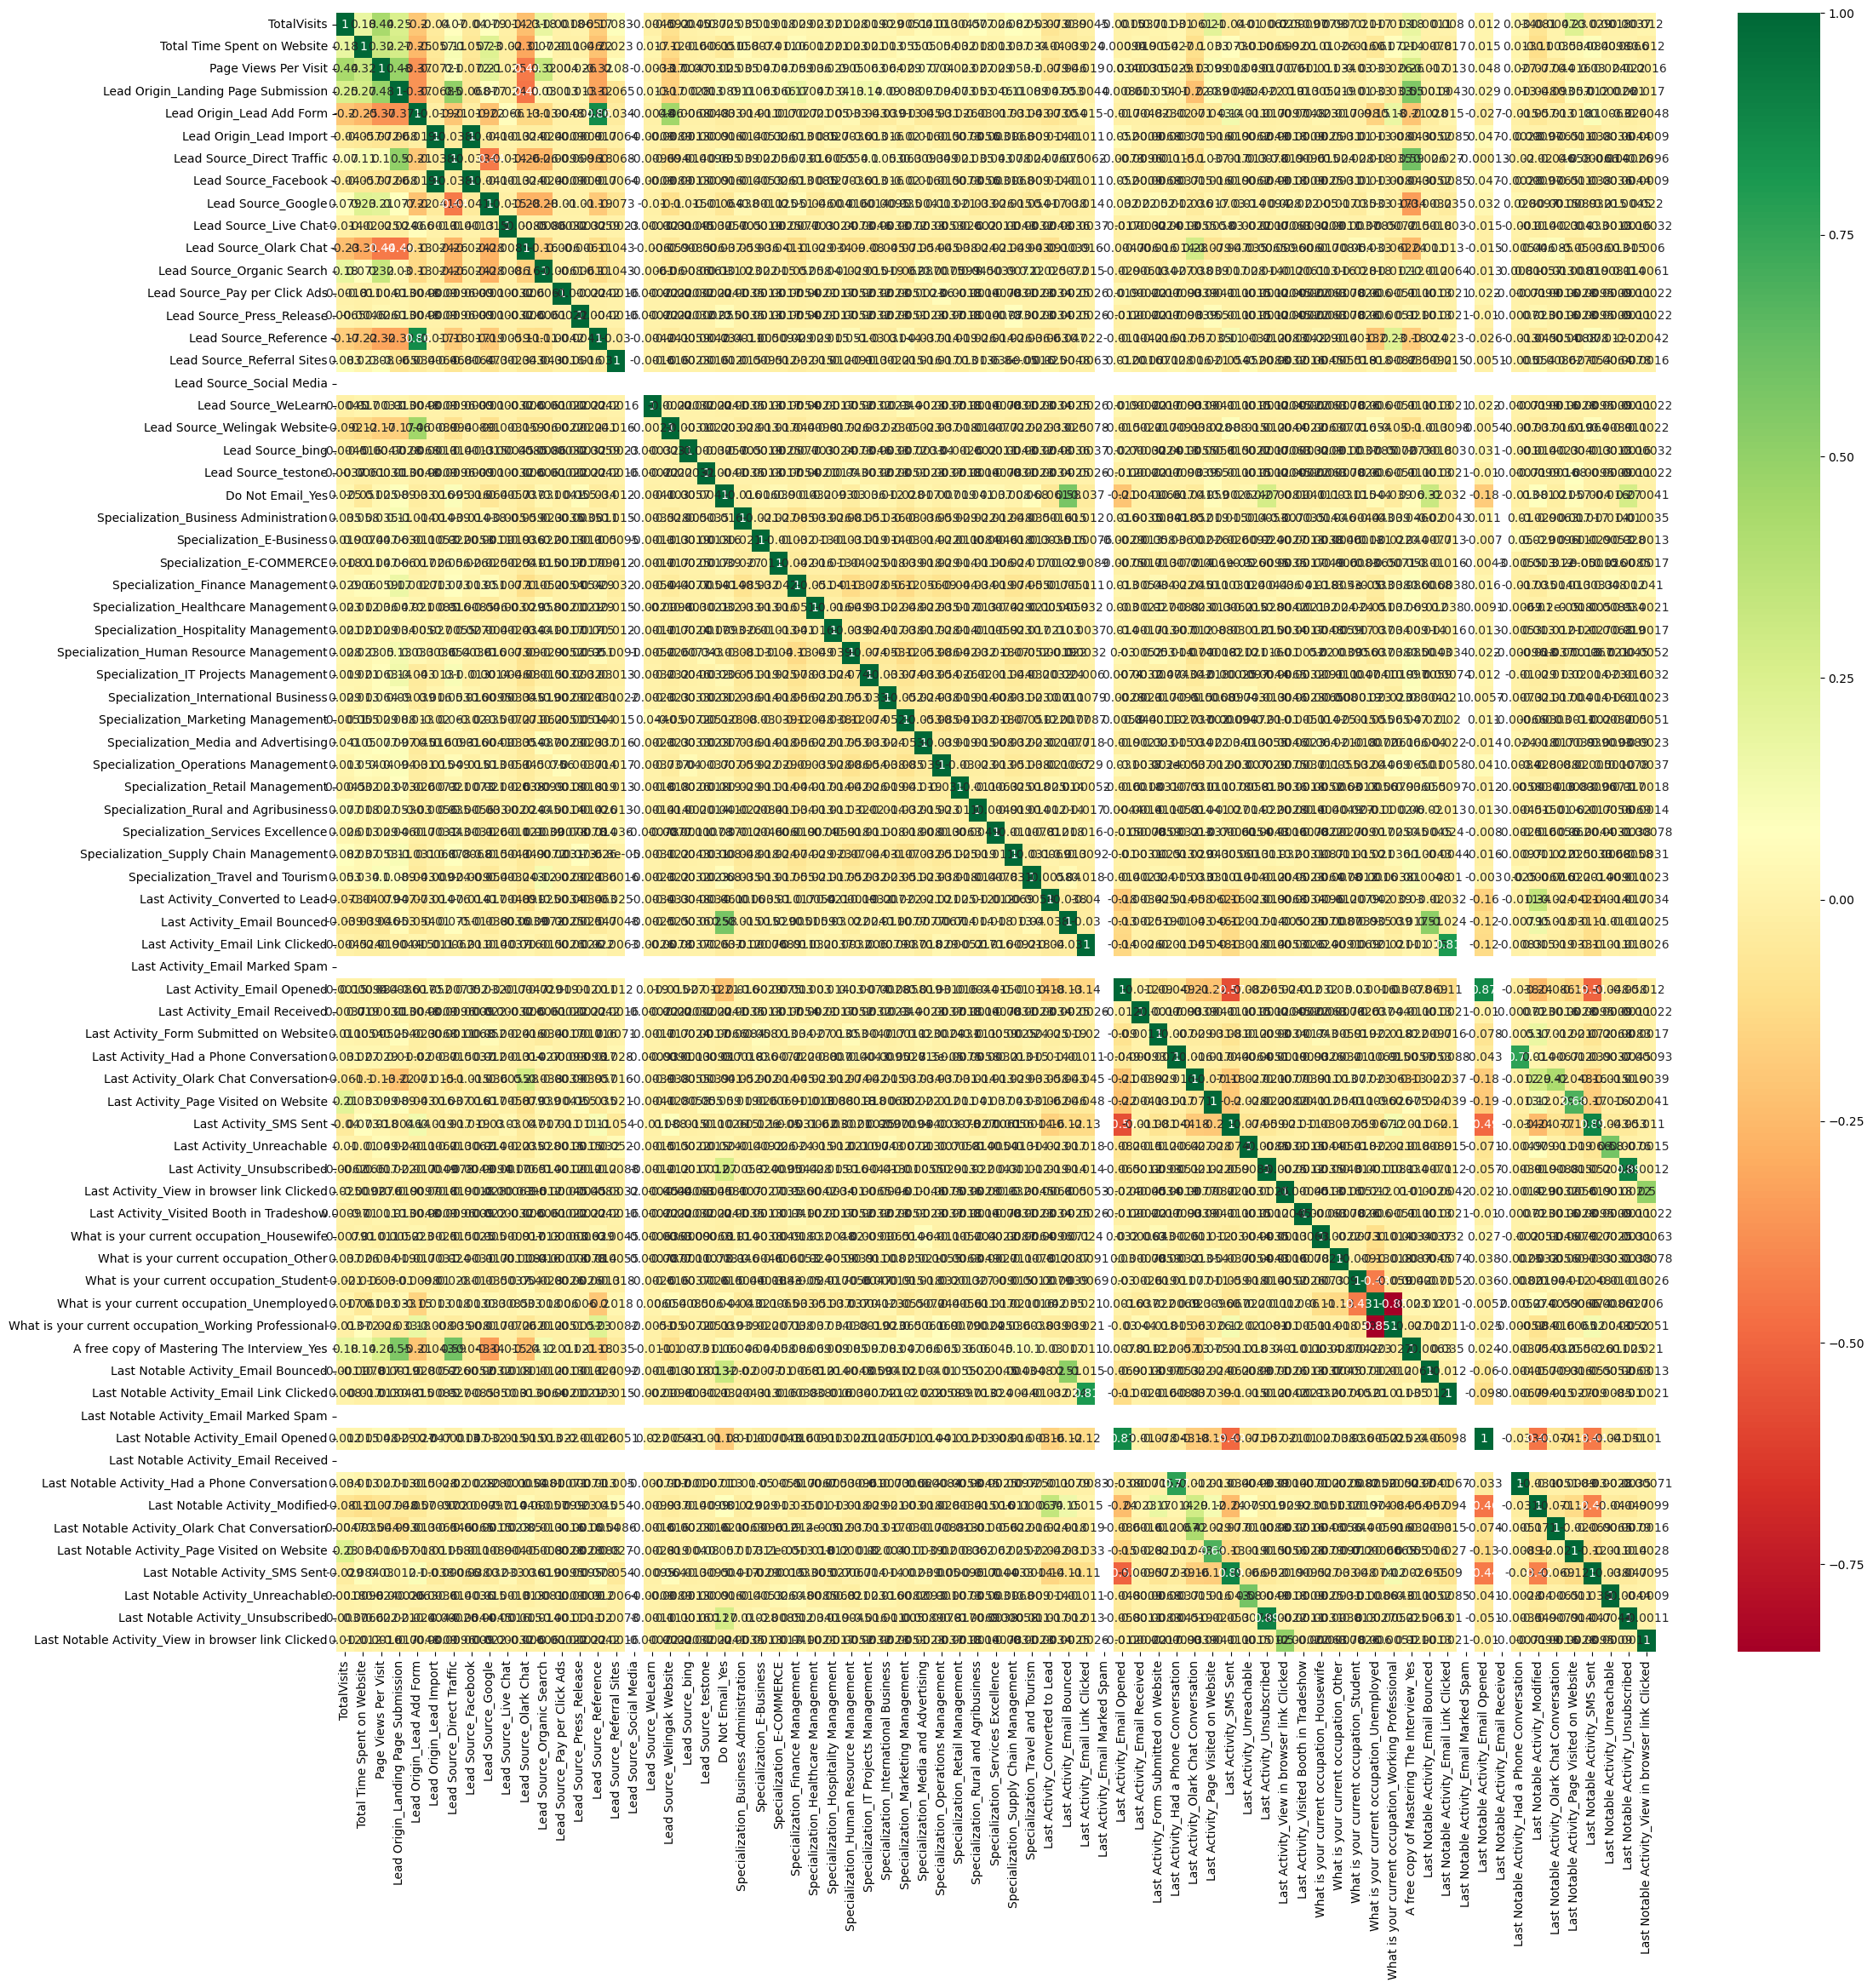

In [46]:
# Let's check the correlation coefficients to see which variables are highly correlated
X_corr = train.corr()
plt.figure(figsize = (25,25))
sns.heatmap(X_corr, annot = True, cmap="RdYlGn")
plt.show()

### Model Building
- We can see there are more number of columns so we will use RFE to get the top 15 variables

In [47]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(train, y_train)

In [48]:
list(zip(train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 55),
 ('Lead Source_Direct Traffic', False, 8),
 ('Lead Source_Facebook', False, 54),
 ('Lead Source_Google', False, 30),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 29),
 ('Lead Source_Pay per Click Ads', False, 38),
 ('Lead Source_Press_Release', False, 52),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 31),
 ('Lead Source_Social Media', False, 59),
 ('Lead Source_WeLearn', False, 41),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 28),
 ('Lead Source_testone', False, 36),
 ('Do Not Email_Yes', True, 1),
 ('Specialization_Business Administration', False, 27),
 ('Specialization_E-Business', False, 20),
 ('Specialization_E-COMM

In [49]:
# selecting the selected variable via RFE in col list

col_accepted = train.columns[rfe.support_]
print(col_accepted)

# checking which columns has been rejected

col_rejected = train.columns[~rfe.support_]
print(col_rejected)

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')
Index(['Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', '

In [50]:
train_rfe = train[col_accepted]

In [51]:
train_rfe.shape

(4461, 15)

In [52]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [54]:
# calculate VIF

calculateVIF(train_rfe)

Features    VIF
2                           Lead Origin_Lead Add Form  84.19
4                               Lead Source_Reference  65.18
5                        Lead Source_Welingak Website  20.03
11         What is your current occupation_Unemployed   3.65
7              Last Activity_Had a Phone Conversation   2.44
13     Last Notable Activity_Had a Phone Conversation   2.43
1                         Total Time Spent on Website   2.38
0                                         TotalVisits   1.62
8                              Last Activity_SMS Sent   1.59
12  What is your current occupation_Working Profes...   1.56
3                              Lead Source_Olark Chat   1.44
6                                    Do Not Email_Yes   1.09
10            What is your current occupation_Student   1.09
9           What is your current occupation_Housewife   1.01
14                  Last Notable Activity_Unreachable   1.01

In [55]:
# Import statsmodels

import statsmodels.api as sm
# Fit a logistic Regression model on train after adding a constant and output the summary

train_sm = sm.add_constant(train_rfe)
logm1 = sm.GLM(y_train, train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Tue, 22 Aug 2023   Deviance:                       4145.5
Time:                        11:33:26   Pearson chi2:                 4.84e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

In [56]:
# Dropping the Lead Source_Reference column as it is having high p and VIF value
train_new = train_rfe.drop(['Lead Source_Reference'], axis = 1)

calculateVIF(train_new)

Features   VIF
10         What is your current occupation_Unemployed  3.65
6              Last Activity_Had a Phone Conversation  2.44
12     Last Notable Activity_Had a Phone Conversation  2.43
1                         Total Time Spent on Website  2.38
2                           Lead Origin_Lead Add Form  1.71
0                                         TotalVisits  1.62
7                              Last Activity_SMS Sent  1.59
11  What is your current occupation_Working Profes...  1.56
3                              Lead Source_Olark Chat  1.44
4                        Lead Source_Welingak Website  1.33
5                                    Do Not Email_Yes  1.09
9             What is your current occupation_Student  1.09
8           What is your current occupation_Housewife  1.01
13                  Last Notable Activity_Unreachable  1.01

In [57]:
# Fit a logistic Regression model on train after adding a constant and output the summary
train_sm2 = sm.add_constant(train_new)
logm2 = sm.GLM(y_train, train_sm2, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Tue, 22 Aug 2023   Deviance:                       4146.5
Time:                        11:33:26   Pearson chi2:                 4.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3658
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

In [58]:
# Dropping "Last Notable Activity_Had a Phone Conversation" as it has highest P value
train_new = train_new.drop(['Last Notable Activity_Had a Phone Conversation'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(train_new)

Features   VIF
10         What is your current occupation_Unemployed  3.65
1                         Total Time Spent on Website  2.38
2                           Lead Origin_Lead Add Form  1.71
0                                         TotalVisits  1.62
7                              Last Activity_SMS Sent  1.59
11  What is your current occupation_Working Profes...  1.56
3                              Lead Source_Olark Chat  1.44
4                        Lead Source_Welingak Website  1.33
5                                    Do Not Email_Yes  1.09
9             What is your current occupation_Student  1.09
6              Last Activity_Had a Phone Conversation  1.01
8           What is your current occupation_Housewife  1.01
12                  Last Notable Activity_Unreachable  1.01

In [59]:
# Fit a logistic Regression model on train after adding a constant and output the summary
train_sm3 = sm.add_constant(train_new)
logm3 = sm.GLM(y_train, train_sm3, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Tue, 22 Aug 2023   Deviance:                       4152.2
Time:                        11:33:26   Pearson chi2:                 4.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3650
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

In [60]:
# Dropping "mnth_Jan" as it has highest P value
train_new = train_new.drop(['What is your current occupation_Housewife'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(train_new)

Features   VIF
9          What is your current occupation_Unemployed  3.64
1                         Total Time Spent on Website  2.37
2                           Lead Origin_Lead Add Form  1.70
0                                         TotalVisits  1.62
7                              Last Activity_SMS Sent  1.59
10  What is your current occupation_Working Profes...  1.56
3                              Lead Source_Olark Chat  1.44
4                        Lead Source_Welingak Website  1.33
5                                    Do Not Email_Yes  1.09
8             What is your current occupation_Student  1.09
6              Last Activity_Had a Phone Conversation  1.01
11                  Last Notable Activity_Unreachable  1.01

In [61]:
# Fit a logistic Regression model on train after adding a constant and output the summary
train_sm4 = sm.add_constant(train_new)
logm4 = sm.GLM(y_train, train_sm4, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Tue, 22 Aug 2023   Deviance:                       4156.7
Time:                        11:33:26   Pearson chi2:                 4.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3644
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

In [62]:
# Dropping "What is your current occupation_Working Professional" as it has highest P value
train_new = train_new.drop(['What is your current occupation_Working Professional'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(train_new)

Features   VIF
9   What is your current occupation_Unemployed  2.82
1                  Total Time Spent on Website  2.00
0                                  TotalVisits  1.54
7                       Last Activity_SMS Sent  1.51
2                    Lead Origin_Lead Add Form  1.45
3                       Lead Source_Olark Chat  1.33
4                 Lead Source_Welingak Website  1.30
5                             Do Not Email_Yes  1.08
8      What is your current occupation_Student  1.06
6       Last Activity_Had a Phone Conversation  1.01
10           Last Notable Activity_Unreachable  1.01

In [63]:
# Fit a logistic Regression model on train after adding a constant and output the summary
train_sm5 = sm.add_constant(train_new)
logm5 = sm.GLM(y_train, train_sm5, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Tue, 22 Aug 2023   Deviance:                       4158.1
Time:                        11:33:26   Pearson chi2:                 4.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3642
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

### Model Evaluation

In [66]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(train_new))
y_train_pred[:10]

8003    0.300117
218     0.142002
4171    0.127629
4037    0.291558
3660    0.954795
207     0.194426
2044    0.178073
6411    0.949460
6498    0.075995
2085    0.982316
dtype: float64

In [67]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)

In [68]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.300117
1          0         0.142002
2          1         0.127629
3          1         0.291558
4          1         0.954795

In [69]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.300117          0
1          0         0.142002          0
2          1         0.127629          0
3          1         0.291558          0
4          1         0.954795          1

In [70]:
# Import metrics from sklearn for evaluation

from sklearn import metrics
# Create confusion matrix 

confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion_matrix)

[[1929  383]
 [ 560 1589]]


In [71]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)*100)

78.86124187401929


In [72]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [73]:
# Calculate the sensitivity

senitivity = TP/(TP+FN)
print(senitivity)
# Calculate the specificity

specificity = TN/(TN+FP)
print(specificity)

0.739413680781759
0.8343425605536332


- We have got the Sensitivity as 74% and Specificity as 83%

In [74]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [75]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

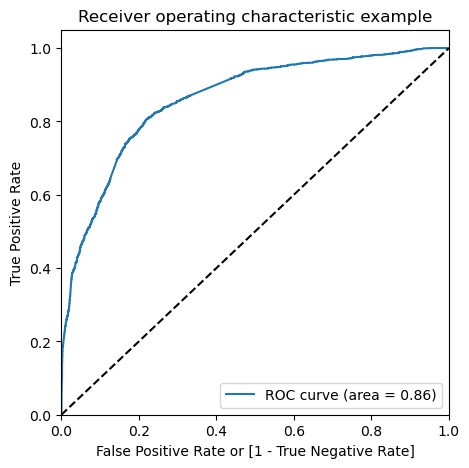

In [76]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [77]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.300117          0    1    1    1    1    0    0    0   
1          0         0.142002          0    1    1    0    0    0    0    0   
2          1         0.127629          0    1    1    0    0    0    0    0   
3          1         0.291558          0    1    1    1    0    0    0    0   
4          1         0.954795          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    1    1    1

In [78]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.481731     0.000000     1.000000
0.1          0.1  0.527012     0.092561     0.994416
0.2          0.2  0.698274     0.469723     0.944160
0.3          0.3  0.767541     0.676038     0.865984
0.4          0.4  0.791975     0.774654     0.810610
0.5          0.5  0.788612     0.834343     0.739414
0.6          0.6  0.757229     0.881055     0.624011
0.7          0.7  0.735037     0.913062     0.543509
0.8          0.8  0.711500     0.951557     0.453234
0.9          0.9  0.644026     0.982699     0.279665


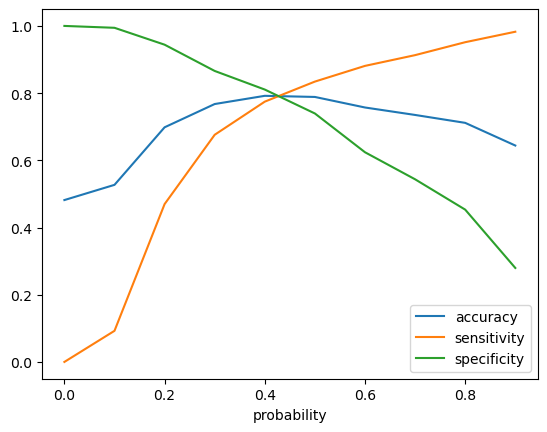

In [79]:
# Lets plot the cutoff 

cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

- We can see that around 0.41, you get the optimal values of the three metrics. 
- So let's choose 0.41 as our cutoff now.

In [80]:
y_train_pred_final['Predicted_final'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.300117          0    1    1    1    1    0    0    0   
1          0         0.142002          0    1    1    0    0    0    0    0   
2          1         0.127629          0    1    1    0    0    0    0    0   
3          1         0.291558          0    1    1    1    0    0    0    0   
4          1         0.954795          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  Predicted_final  
0    0    0    0                0  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    1    1    1                1

In [81]:
confusion_matrix_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted_final )
print(confusion_matrix_1)

[[1815  497]
 [ 431 1718]]


In [82]:
# Let's check the final accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_final)*100)

79.1974893521632


In [83]:
# Let's evaluate the other metrics as well

TP = confusion_matrix_1[1,1] # true positive 
TN = confusion_matrix_1[0,0] # true negatives
FP = confusion_matrix_1[0,1] # false positives
FN = confusion_matrix_1[1,0] # false negatives

In [84]:
# Calculate final Sensitivity

sensi_final = TP/(TP+FN)
print(sensi_final*100)
# Calculate final Specificity

speci_final = TN/(TN+FP)
print(speci_final*100)

79.94416007445324
78.50346020761245


- This cutoff is good as per the final values of senitivity and specificity

In [85]:
# Calculating Precision

precision = confusion_matrix_1[1,1]/(confusion_matrix_1[0,1]+confusion_matrix_1[1,1])
print(precision)
# Calculating Recall

recall = confusion_matrix_1[1,1]/(confusion_matrix_1[1,0]+confusion_matrix_1[1,1])
print(recall)

0.7756207674943567
0.7994416007445323


In [86]:
from sklearn.metrics import precision_score, recall_score

In [87]:
# Precision score on train data
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_final)

0.7756207674943567

In [88]:
# Checking Recall Score on train data
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted_final)

0.7994416007445323

- From the above we can say that Precision is 77% and Recall is 79%

## Predictions on Test Data

In [89]:
# Scaling the Test data using Transform
test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [90]:
test = test[col_accepted]
test.head()

TotalVisits  Total Time Spent on Website  Lead Origin_Lead Add Form  \
4771     0.000000                     0.000000                          1   
6122     0.094595                     0.029294                          0   
9202     0.054054                     0.420328                          0   
6570     0.040541                     0.382157                          0   
2668     0.108108                     0.398580                          0   

      Lead Source_Olark Chat  Lead Source_Reference  \
4771                       0                      1   
6122                       0                      0   
9202                       0                      0   
6570                       0                      0   
2668                       0                      0   

      Lead Source_Welingak Website  Do Not Email_Yes  \
4771                             0                 0   
6122                             0                 0   
9202                             0                 0   
6570                             0                 1   
2668                             0                 0   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
4771                                       0                       1   
6122                                       0                       0   
9202                                       0                       1   
6570                                       0                       1   
2668                                       0                       1   

      What is your current occupation_Housewife  \
4771                                          0   
6122                                          0   
9202                                          0   
6570                                          0   
2668                                          0   

      What is your current occupation_Student  \
4771                                        0   
6122                                        0   
9202                                        0   
6570                                        0   
2668                                        0   

      What is your current occupation_Unemployed  \
4771                                           0   
6122                                           1   
9202                                           1   
6570                                           1   
2668                                           1   

      What is your current occupation_Working Professional  \
4771                                                  1      
6122                                                  0      
9202                                                  0      
6570                                                  0      
2668                                                  0      

      Last Notable Activity_Had a Phone Conversation  \
4771                                               0   
6122                                               0   
9202                                               0   
6570                                               0   
2668                                               0   

      Last Notable Activity_Unreachable  
4771                                  0  
6122                                  0  
9202                                  0  
6570                                  0  
2668                                  0

In [91]:
# Adding a constant to test

test_sm = sm.add_constant(test[col_accepted])
# Check test_sm

test_sm

const  TotalVisits  Total Time Spent on Website  \
4771    1.0     0.000000                     0.000000   
6122    1.0     0.094595                     0.029294   
9202    1.0     0.054054                     0.420328   
6570    1.0     0.040541                     0.382157   
2668    1.0     0.108108                     0.398580   
...     ...          ...                          ...   
5828    1.0     0.040541                     0.027519   
6583    1.0     0.040541                     0.153573   
5531    1.0     0.189189                     0.707945   
3056    1.0     0.040541                     0.421216   
4088    1.0     0.067568                     0.534842   

      Lead Origin_Lead Add Form  Lead Source_Olark Chat  \
4771                          1                       0   
6122                          0                       0   
9202                          0                       0   
6570                          0                       0   
2668                          0                       0   
...                         ...                     ...   
5828                          0                       0   
6583                          0                       0   
5531                          0                       0   
3056                          0                       0   
4088                          0                       0   

      Lead Source_Reference  Lead Source_Welingak Website  Do Not Email_Yes  \
4771                      1                             0                 0   
6122                      0                             0                 0   
9202                      0                             0                 0   
6570                      0                             0                 1   
2668                      0                             0                 0   
...                     ...                           ...               ...   
5828                      0                             0                 0   
6583                      0                             0                 0   
5531                      0                             0                 0   
3056                      0                             0                 1   
4088                      0                             0                 0   

      Last Activity_Had a Phone Conversation  Last Activity_SMS Sent  \
4771                                       0                       1   
6122                                       0                       0   
9202                                       0                       1   
6570                                       0                       1   
2668                                       0                       1   
...                                      ...                     ...   
5828                                       0                       1   
6583                                       0                       1   
5531                                       0                       0   
3056                                       0                       1   
4088                                       0                       0   

      What is your current occupation_Housewife  \
4771                                          0   
6122                                          0   
9202                                          0   
6570                                          0   
2668                                          0   
...                                         ...   
5828                                          0   
6583                                          0   
5531                                          0   
3056                                          0   
4088                                          0   

      What is your current occupation_Student  \
4771                                        0   
6122                                        0   
9202                                  

In [92]:

test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation'], 1, inplace = True)

In [93]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(test))

In [94]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head

y_pred_1.head()

0
4771  0.996296
6122  0.239351
9202  0.786950
6570  0.373668
2668  0.859736

In [95]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [96]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [97]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
# Check 'y_pred_final'

y_pred_final.head()

Converted         0
0          1  0.996296
1          0  0.239351
2          0  0.786950
3          1  0.373668
4          1  0.859736

In [98]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Conversion_Prob
0          1         0.996296
1          0         0.239351
2          0         0.786950
3          1         0.373668
4          1         0.859736

In [99]:
# Make predictions on the test set using 0.41 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)

# Check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         0.996296                1
1          0         0.239351                0
2          0         0.786950                1
3          1         0.373668                0
4          1         0.859736                1

- Model Evaluation

In [100]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7609832635983264

In [101]:
confusion = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion

array([[679, 317],
       [140, 776]], dtype=int64)

In [102]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [103]:
# Calculate sensitivity
Sensitivity = TP / float(TP+FN)
print(Sensitivity)
# Calculate specificity
Specificity = TN / float(TN+FP)
print(Specificity)

0.8471615720524017
0.6817269076305221


In [104]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7099725526075022

In [105]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8471615720524017

In [106]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [107]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

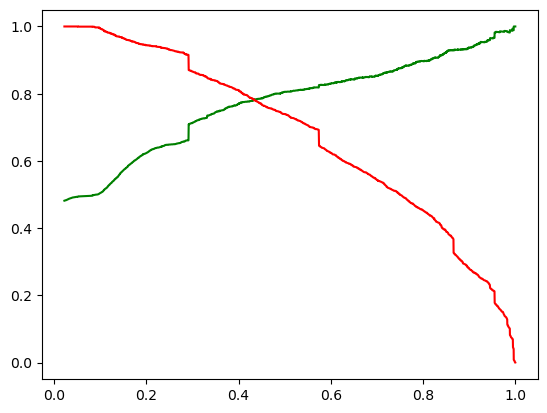

In [108]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [109]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.300117          0    1    1    1    1    0    0    0   
1          0         0.142002          0    1    1    0    0    0    0    0   
2          1         0.127629          0    1    1    0    0    0    0    0   
3          1         0.291558          0    1    1    1    0    0    0    0   
4          1         0.954795          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  Predicted_final  final_predicted  
0    0    0    0                0                0  
1    0    0    0                0                0  
2    0    0    0                0                0  
3    0    0    0                0                0  
4    1    1    1                1                1

In [110]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7895090786819099

In [111]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1852,  460],
       [ 479, 1670]], dtype=int64)

In [112]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [115]:
# Calculate sensitivity
Sensit = TP / float(TP+FN)
print(Sensit)

0.7771056305258259


In [116]:
# Calculate specificity
Specifi = TN / float(TN+FP)
print(Specifi)

0.801038062283737


In [113]:
# Calculate Precision

TP/(TP+FP)

0.784037558685446

In [114]:
# Calculate Recall

TP/(TP+FN)

0.7771056305258259

## Recommendations

- The company should consider the leads who "visits" more to the website as these are more likely to get converted.
- The leads who spent more time on the websites as these are more likely to get converted.
- The leads whose Lead Origin is Lead Add Form should be considered as they are likely to get converted.
- Last Activity_Had a Phone Conversation should be considered.
- The company should also consider the leads from the lead sources "Welingak Websites" and "Olark Chat" as these are likely to get converted.
- The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.
- What is your current occupation_Student and What is your current occupation_Unemployed cannot be considered as they are not likely to get converted.